# <ins>OVERSAMPLING AVEC RANDOMFORESTCLASSIFIER</ins>

## <ins>BUT DU NOTEBOOK </ins>

Des méthodes dites de rééchantillonnage permettent de modifier les données avant d'entraîner le modèle dessus.
Ces méthodes se divisent en 2 groupes principaux : les méthodes de sur-échantillonnage (Oversampling ) et de sous-échantillonnage (Undersampling).

Les méthodes d'Oversampling fonctionnent en augmentant le nombre d'observations de la / des classes minoritaires afin d'arriver à un ratio classe minoritaire / classe majoritaire satisfaisant.
L'ensemble des méthodes d'Oversampling disponibles dans le package imblearn est disponible ici.
Nous nous conterons d'aborder l'Oversampling aléatoire et le SMOTE.

Les classes de imblearn permettent d'appliquer les transformations aux données grâces aux méthodes fit() puis resample() ou fit_resample() qui s'ajuste à un ensemble de données (variables explicatives + variable cible) et retourne les mêmes tableaux rééchantillonnés.

## <ins>IMPORT DES LIBRAIRIES ET DU DATASET</ins>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import f1_score, classification_report
from imblearn.metrics import classification_report_imbalanced, geometric_mean_score
from imblearn.over_sampling import RandomOverSampler, SMOTE

import pickle

import projet_rakuten

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
2024-05-07 20:46:11.331341: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-07 20:46:12.567350: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv('df_preprocess.csv', index_col = [0])

In [3]:
df.head()

,prdtypecode,filepath,produit_clean
1,2280,./images/train/image_1008141237_product_436067...,journal art 2001 art marche salon art asiatiqu...
2,50,./images/train/image_938777978_product_2011151...,grand stylet ergonomique bleu gamepad nintendo...
3,1280,./images/train/image_457047496_product_5041875...,peluche donald europe disneyland 2000 marionne...
4,2705,./images/train/image_1077757786_product_278535...,guerre tuques luc idées grandeur veut organise...
5,2280,./images/train/image_393356830_product_5862738...,afrique contemporaine hiver 2004 dossier japon...


## <ins>SPLIT ET TOKENISATION</ins>

In [4]:
# PARTAGE DE NOTRE DATASET EN 2 DATASET TRAIN ET VALIDATION

features = df['produit_clean']
target = df['prdtypecode']

# Ayant un désequilibre de classe, nous ajoutons l'argument stratify
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.15, random_state=123, stratify = target)

display('Shape X_train : ', X_train.shape)
display('Shape X_test : ', X_test.shape)

'Shape X_train : '

(64716,)

'Shape X_test : '

(11421,)

In [5]:
# Nous nous limitons aux 500 mots les plus utilisés
vectorizer = CountVectorizer(max_features = 100)

X_train = vectorizer.fit_transform(X_train).todense() # todense permet de supprimer les valeurs nulles pour véiter les matrices creuses

X_test = vectorizer.transform(X_test).todense()

## <ins>OVERSAMPLING SMOTE ET RANDOMOVERSAMPLER</ins>

In [6]:
ros = RandomOverSampler()
smote = SMOTE()

X_train =  np.asarray(X_train)

X_ro, y_ro = ros.fit_resample(X_train, y_train)
X_sm, y_sm = smote.fit_resample(X_train, y_train)

print('Classes échantillon oversampled :', dict(pd.Series(y_ro).value_counts()))
print('Classes échantillon SMOTE :', dict(pd.Series(y_sm).value_counts()))

Classes échantillon oversampled : {2522: 8139, 1920: 8139, 1300: 8139, 1940: 8139, 1280: 8139, 2585: 8139, 2583: 8139, 2280: 8139, 2060: 8139, 1302: 8139, 1160: 8139, 50: 8139, 2705: 8139, 2582: 8139, 10: 8139, 1560: 8139, 2403: 8139, 40: 8139, 60: 8139, 2220: 8139, 1281: 8139, 1140: 8139, 1320: 8139, 1180: 8139, 2905: 8139, 2462: 8139, 1301: 8139}
Classes échantillon SMOTE : {2522: 8139, 1920: 8139, 1300: 8139, 1940: 8139, 1280: 8139, 2585: 8139, 2583: 8139, 2280: 8139, 2060: 8139, 1302: 8139, 1160: 8139, 50: 8139, 2705: 8139, 2582: 8139, 10: 8139, 1560: 8139, 2403: 8139, 40: 8139, 60: 8139, 2220: 8139, 1281: 8139, 1140: 8139, 1320: 8139, 1180: 8139, 2905: 8139, 2462: 8139, 1301: 8139}


In [7]:
rdf = RandomForestClassifier(max_features='log2', n_estimators=1000, n_jobs=-1, random_state=22)

rdf.fit(X_ro, y_ro)

RandomForestClassifier(max_features='log2', n_estimators=1000, n_jobs=-1,
                       random_state=22)

Début de la prédiction à 20:36:13
Fin de la récupération à 20:36:44
Délai du modèle pour la prédiction :  0:00:30.254675
ACCURACY DU MODELE :  0.6475952546722912

F1_SCORE_WEIGHTED :  0.6925879110525116

              precision    recall  f1-score   support

          10       0.12      0.90      0.21      8139
          40       0.96      0.31      0.47      8139
          50       0.93      0.63      0.75      8139
          60       0.88      0.75      0.81      8139
        1140       0.83      0.31      0.46      8139
        1160       0.77      0.34      0.47      8139
        1180       0.69      0.24      0.36      8139
        1280       0.92      0.61      0.73      8139
        1281       0.80      0.56      0.66      8139
        1300       0.94      0.79      0.86      8139
        1301       0.87      0.79      0.83      8139
        1302       0.99      0.84      0.90      8139
        1320       0.95      0.74      0.83      8139
        1560       0.96      0.87      

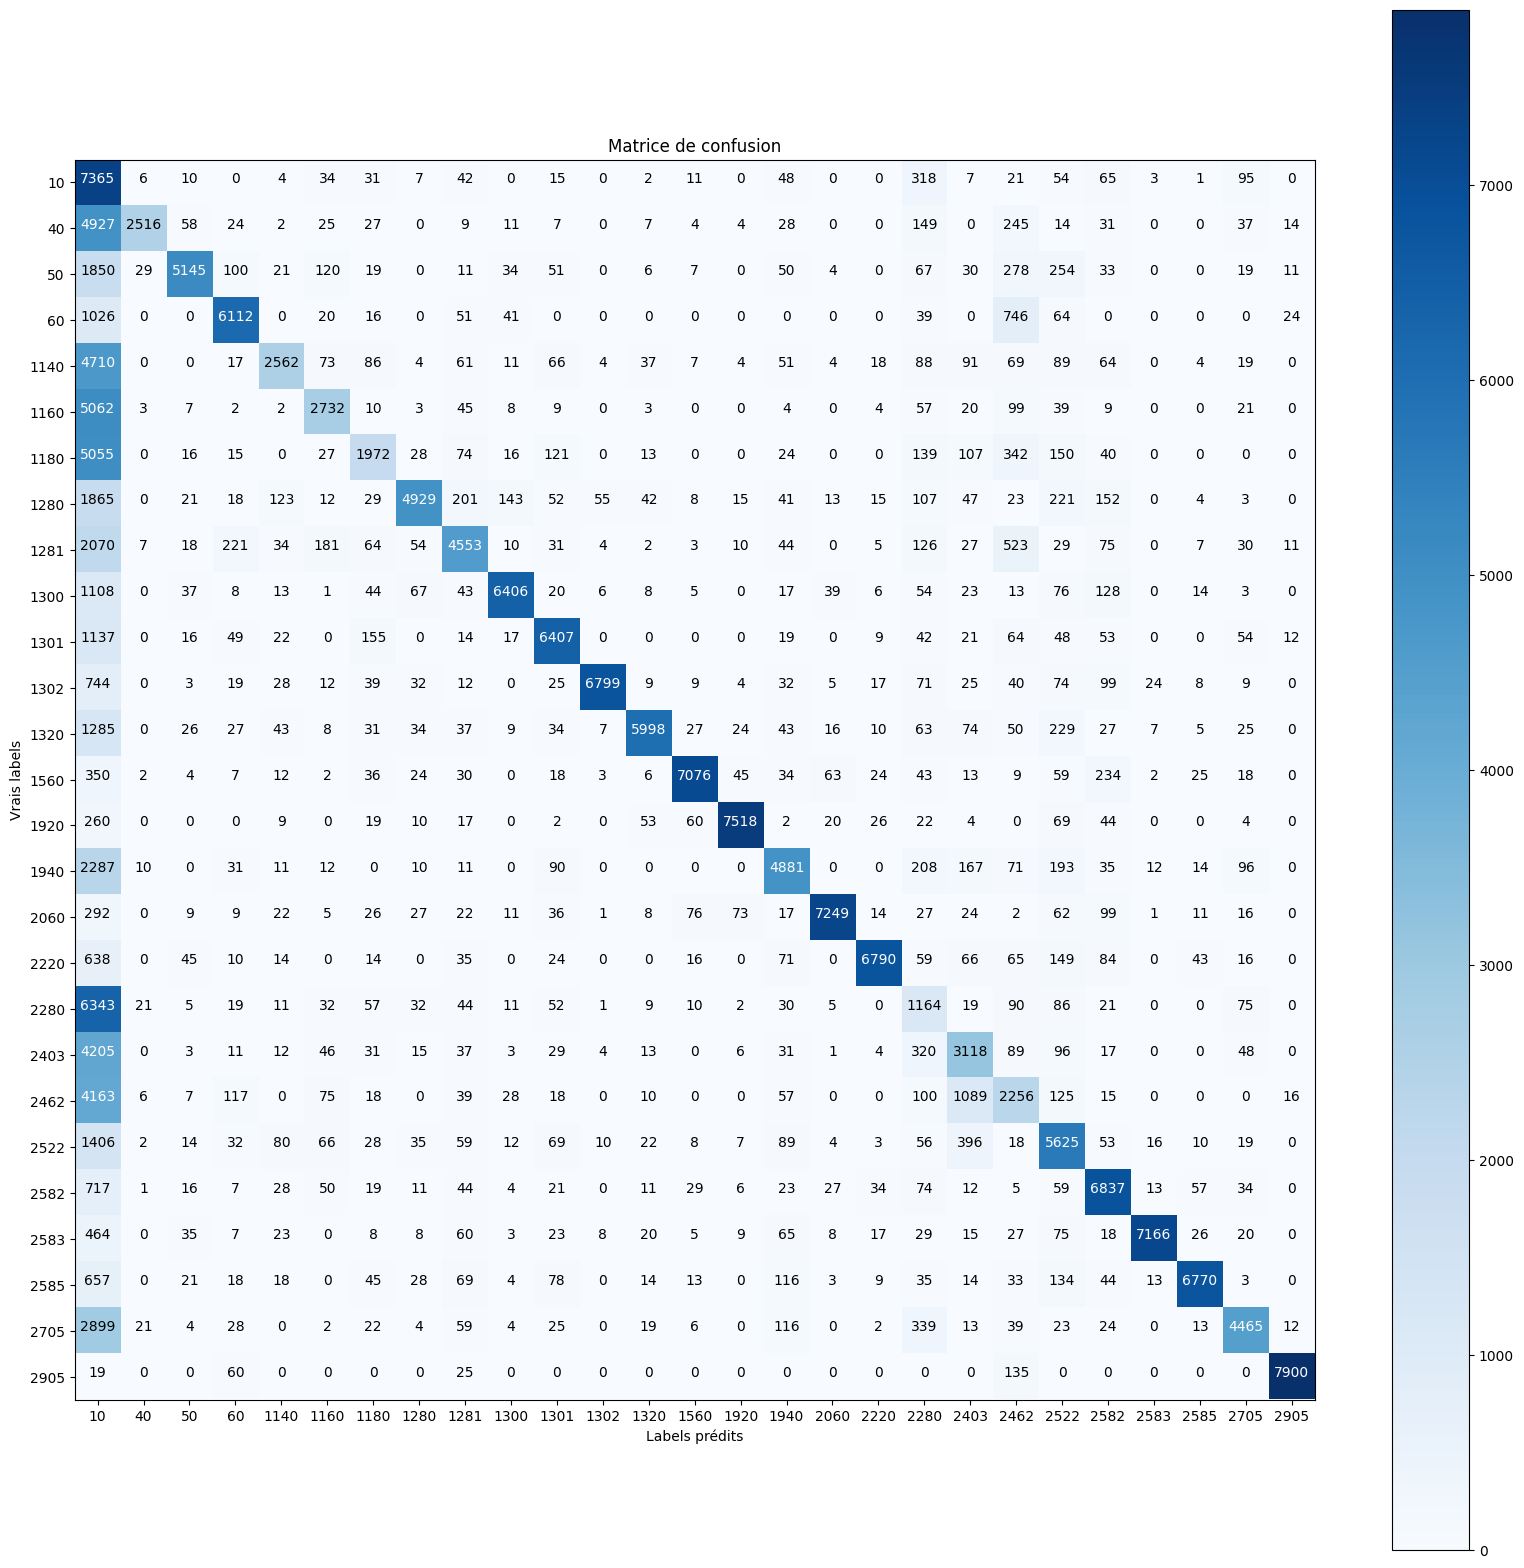



 Sauvegarde de notre modèle dans le répertoire ./sauvegarde_modele/RandomForest_Oversampling_ROS/


In [ ]:
from projet_rakuten import predict_randomforest

filepath = './sauvegarde_modele/RandomForest_Oversampling_ROS/'

predict_randomforest(rdf, X_ro, y_ro, save_filepath=filepath)

In [8]:
rdf = RandomForestClassifier(max_features='log2', n_estimators=1000, n_jobs=-1, random_state=22)

rdf.fit(X_sm, y_sm)

RandomForestClassifier(max_features='log2', n_estimators=1000, n_jobs=-1,
                       random_state=22)

Début de la prédiction à 20:50:43
Fin de la récupération à 20:51:13
Délai du modèle pour la prédiction :  0:00:29.668280
ACCURACY DU MODELE :  0.5864993879491975

F1_SCORE_WEIGHTED :  0.6252701650630199

              precision    recall  f1-score   support

          10       0.11      0.91      0.19      8139
          40       1.00      0.28      0.44      8139
          50       0.83      0.51      0.63      8139
          60       0.60      0.82      0.69      8139
        1140       0.73      0.27      0.40      8139
        1160       0.73      0.33      0.46      8139
        1180       0.62      0.15      0.24      8139
        1280       0.97      0.55      0.70      8139
        1281       0.74      0.47      0.57      8139
        1300       0.95      0.75      0.84      8139
        1301       0.79      0.66      0.72      8139
        1302       0.97      0.73      0.83      8139
        1320       0.88      0.67      0.76      8139
        1560       0.96      0.81      

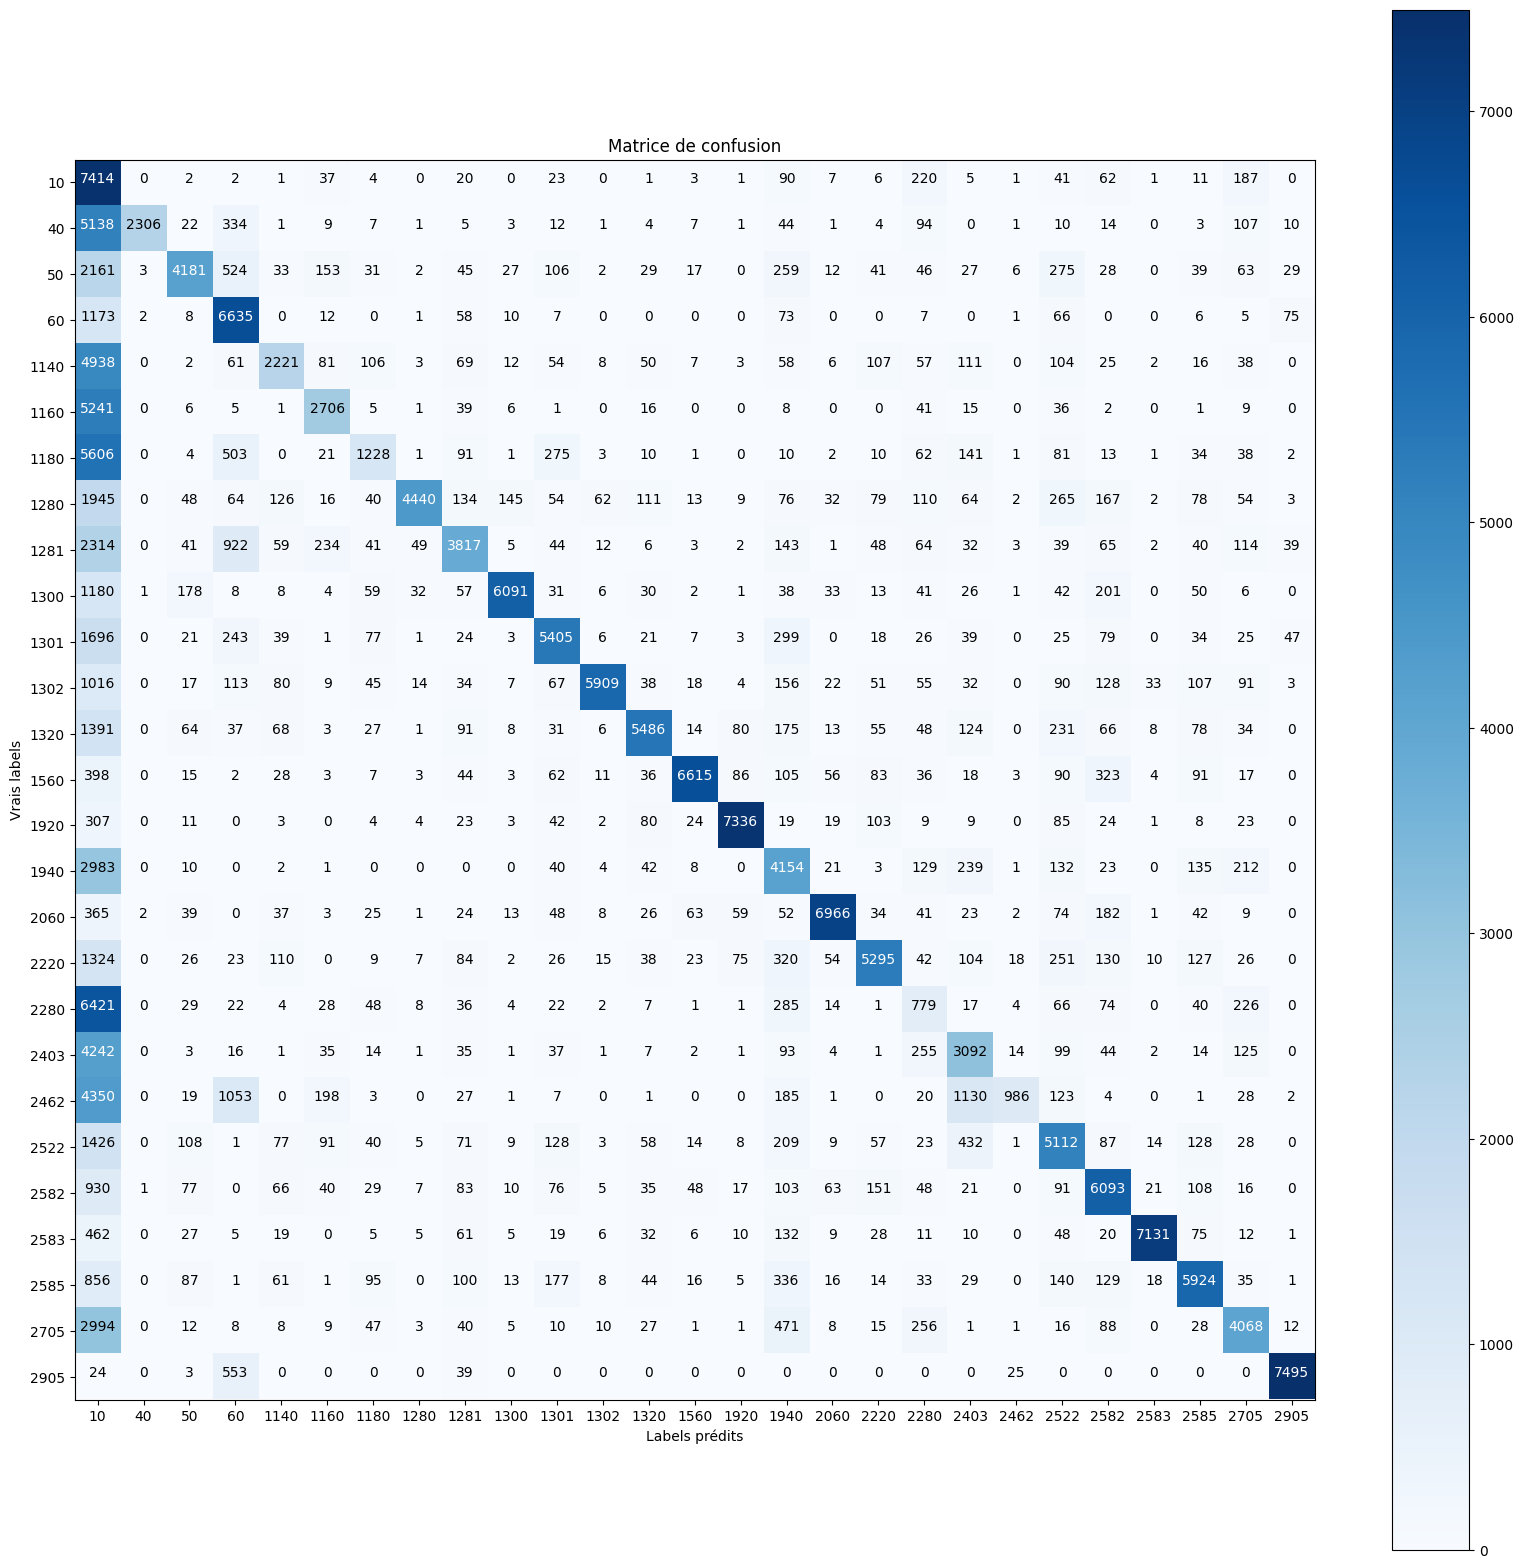



 Sauvegarde de notre modèle dans le répertoire ./sauvegarde_modele/RandomForest_Oversampling_SMOTE/


In [ ]:
from projet_rakuten import predict_randomforest

filepath = './sauvegarde_modele/RandomForest_Oversampling_SMOTE/'

predict_randomforest(rdf, X_sm, y_sm, save_filepath=filepath)